In [1]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [2]:
# two random correlated variables
v = np.random.randn(10)
w = v + np.random.randn(len(v))

# correlation using mean-centered dot products

# mean-center
vm = v-np.mean(v)
wm = w-np.mean(w)

# dot products
r_me = np.dot(vm,wm) / np.sqrt(np.dot(vm,vm)*np.dot(wm,wm))


# correlation using numpy
r_np = np.corrcoef(v,w)[0,1]


# print results
print(f'r from np.corr: {r_np:.3f}')
print(f'r from np.dot : {r_me:.3f}')

r from np.corr: 0.566
r from np.dot : 0.566


# Exe 2

In [3]:
# create random data
N = 43
r = .4
x = np.random.randn(N)
y = np.random.randn(N)
y = x*r + y*np.sqrt(1-r**2)

# r,p from numpy
r_np = np.corrcoef(x,y)[0,1]
t = r_np*np.sqrt(N-2) / np.sqrt(1-r_np**2)
p_np = stats.t.sf(np.abs(t),N-2) * 2  

# r,p from scipy
r_sp,p_sp = stats.pearsonr(x,y)

# print correlation values
print(f'r (p) from numpy: {r_np:.4f} ({p_np:.4f})')
print(f'r (p) from scipy: {r_sp:.4f} ({p_sp:.4f})')

r (p) from numpy: 0.3742 (0.0134)
r (p) from scipy: 0.3742 (0.0134)


In [4]:
def getpvals(x,y):

  # r,p from numpy
  r_np = np.corrcoef(x,y)[0,1]
  t = r_np*np.sqrt(len(x)-2) / np.sqrt(1-r_np**2)
  p_np = stats.t.sf(np.abs(t),len(x)-2) * 2  # times 2 for a two-sided test

  # r,p from scipy
  r_sp,p_sp = stats.pearsonr(x,y)

  return p_np,p_sp

In [5]:
# range of correlation values
rvals = np.linspace(0,.99,40)

# results matrix
pvalues = np.zeros((len(rvals),2))


# run the experiment
for ri in range(len(rvals)):

  # create the data
  x = np.random.randn(44)
  y = np.random.randn(44)
  y = x*rvals[ri] + y*np.sqrt(1-rvals[ri]**2)

  # get the two p-values
  pvalues[ri,:] = getpvals(x,y)

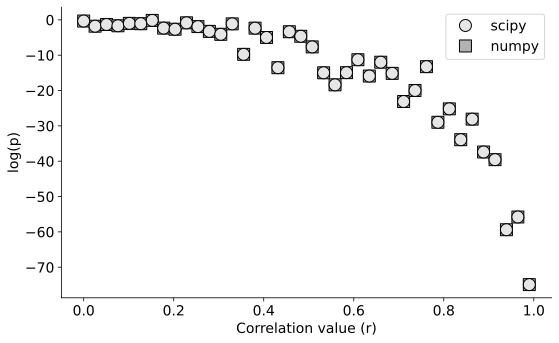

In [6]:
# plot
plt.figure(figsize=(8,5))
plt.plot(rvals,np.log(pvalues[:,1]),'ko',markersize=12,markerfacecolor=(.9,.9,.9),label='scipy')
plt.plot(rvals,np.log(pvalues[:,0]),'ks',markersize=12,markerfacecolor=(.7,.7,.7),label='numpy',zorder=-1)
plt.legend()
plt.xlabel('Correlation value (r)')
plt.ylabel('log(p)')

# display the results
plt.tight_layout()
plt.show()

# Exe 3

In [7]:
# matrix of p-values

N = 10000 # observations
M = 15 # features

# data matrix
X = np.random.randn(N,M)

# correlation matrix
R = np.corrcoef(X.T)

# confirm that it's the right shape
print(f'Correlation matrix shape: {R.shape}')

Correlation matrix shape: (15, 15)


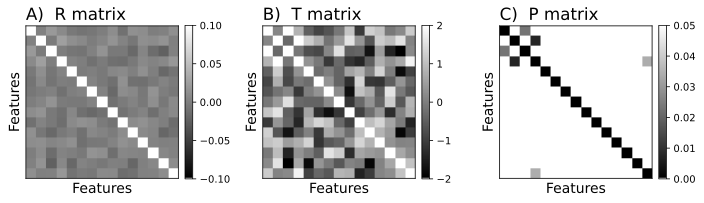

In [8]:
# compute the t-values
Tnum = R*np.sqrt(N-2)
Tden = np.sqrt(1-R**2) + np.finfo(float).eps # adding a tiny number to avoid n/0

T = Tnum / Tden

# compute the p-values
P = stats.t.sf(T,N-2)

# visualize all matrices
fig,axs = plt.subplots(1,3,figsize=(10,5))

cax = axs[0].imshow(R,vmin=-.1,vmax=.1,cmap='gray')
axs[0].set_title(r'A)  R matrix')
c = fig.colorbar(cax,fraction=.046,pad=.04); c.ax.tick_params(labelsize=10)

cax = axs[1].imshow(T,vmin=-2,vmax=2,cmap='gray')
axs[1].set_title(r'B)  T matrix')
c = fig.colorbar(cax,fraction=.046,pad=.04); c.ax.tick_params(labelsize=10)

cax = axs[2].imshow(P,vmin=0,vmax=.05,cmap='gray')
axs[2].set_title(r'C)  P matrix')
c = fig.colorbar(cax,fraction=.046,pad=.04); c.ax.tick_params(labelsize=10)

# properties common to all axes
for a in axs:
  a.set(xticks=[],yticks=[],xlabel='Features',ylabel='Features')
  a.spines[['right','top']].set_visible(True)

# display the figure
plt.tight_layout()
plt.show()